In [1]:
# Import modules 
import matplotlib.pyplot as plt # <- Matplotlib
from datetime import datetime   # <- Additional package we are going to use for the challenge in the end
import numpy as np  # <- Numpy

# Introduction to Matplotlib - Visualization with Python

Matplotlib is a Python package for data visualization (static, animated and interactive), typically in the form of plots, graphs, charts and animations. In fact, it allows you to target just about any plot output you would like.  

* In this notebook, we will go through some of the basics to get you started – BUT – there are many, many more opportunities. 
* You will need to explore those on your own and as relevant to the particular needs of your work.

## A quick overview of Matplotlib

**Pyplot**
matplotlib.pyplot is a so-called API (Application Programming Interface) for the matplotlib that makes it possible to use Python as an open-source alternative to MATLAB when it comes to plot functionality.

### The two faces of Matplotlib

Matplotlib comes with two interfaces:
1. **A MATLAB-style state-based interface** (simple plotting ala MATLAB-style).

    This interface is stateful, meaning that it keeps track of state (i.e., the current figure and axes), which is where all `plt` commands apply.
2. **An object-oriented interface** (more advanced and customizable)
    
    Here the plotting functions are methods working directly on the object instances (`Figure` and `Axes`)

**NOTE** While most of the methods applicable to `plt` also works on `Axis` objects, there are some (slightly annoying) differences, e.g., 

- `plt.xlim()` -> `axis.set_xlim()` (likewise for ylim)
- `plt.xlabel()` -> `axis.set_xlabel()`(likewise for ylabel)
- `plt.title()` -> `axis.set_title()`

### Anatomy of a Figure object
Figure inspired by: [Geeksforgeeks](https://www.geeksforgeeks.org/python-introduction-matplotlib/)

![](matplotlib_anatomy.png)

**IMPORTANT**
 * Go through the code step-by-step to understand what is going on
 * Every time you see a new Python/Matplotlib function/keyword - look up the documentation online and try out how it works

Much more information and many more examples can be found [here](\matplotlib.org)

## Let's start by plotting a sine function using the MATLAB-style interface

The function:

$f(x) = y = \sin(x)$

### So, what do we need?

1. A set of x-values covering the range of interest
2. Evaluate the function at these x-values
3. Plot the function values against the x-values
4. Save the plot as a figure

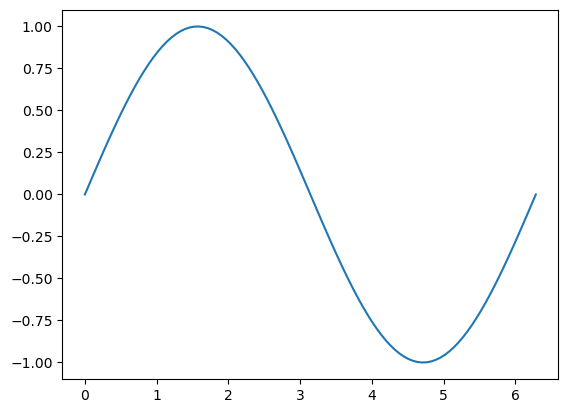

In [2]:
# Step 1 - Usese numpy linspace to create an array of 100 evenly spaced x-values from 0 to 2*pi.
xvalues = np.linspace(0, 2 * np.pi, 100)

# Step 2 - Use this array, we evaluate the function values
yvalues = np.sin(xvalues)

# Step 3 - Use the matplotlib.pyplot plot function to plot the x-values and associated y-values as a line
plt.plot(xvalues, yvalues)

# Step 4 - Save the plot as a png figure with name sine_plot
plt.savefig("sine_plot.png", dpi=300)

### Now this is not very pretty. 

**Beautification**
* We forgot axis labels
* We only want to show the plot for the range of x-values used
* We want the plotted line to be red instead of blue, and it also needs to be a big thicker
* We want the fonts to be bigger - both axis and tick labels

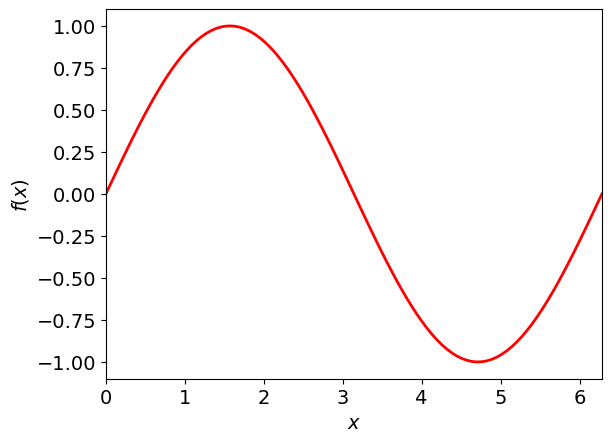

In [3]:
# Change line width and color
plt.plot(xvalues, yvalues, linewidth=2, color="red")

# Add axis labels and adjust their fontsize
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)

# Change size of the tick labels
plt.tick_params(axis="both", labelsize=14)

# Adjust plot range
plt.xlim([0, 2 * np.pi])

# Save the plot as a png figure with name sine_plot_beautified
# The file extention (.png, -jpb, .pdf) give the respective format of the figure. The resolution can be indicated using dpi.
plt.savefig("sine_plot_beautified.png", dpi=300)

### If you have a series of (x, y) values, you can also plot them as separate points using matplotlib.pyplot scatter

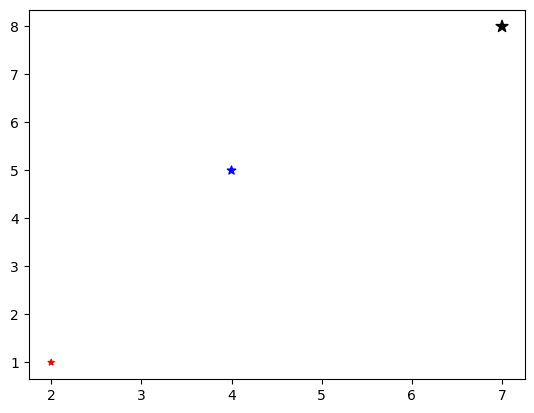

In [4]:
# This time I use a list just to show you that the inputs can be any float or array-like object
xvalues = [2, 4, 7]
yvalues = [1, 5, 8]

colors = ["red", "blue", "black"]
sizes = [20, 40, 80]

plt.scatter(xvalues, yvalues, c=colors, marker="*", s=sizes)

## Several subplots using the MATLAB-style interface

We can make several plots in a figure by using the matplotlib.pyplot `subplot` function. 
Using this function, you can create a subplot and set the current axis of `plt`. Please note that you have no "handle" of each subplot - you have to change the state of `plt` to the relevant subplot whenever you want to work on it.

Syntax: `axis = plt.subplot(<number of rows>, <number of cols>, <panel index>)`

where `axis` is the Axes of the subplot.
Please see this [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) for more options.

Let's see an example below where we plot cosine in a plot to the left and sine in a plot to the right.

Text(-2, 0.9, 'b)')

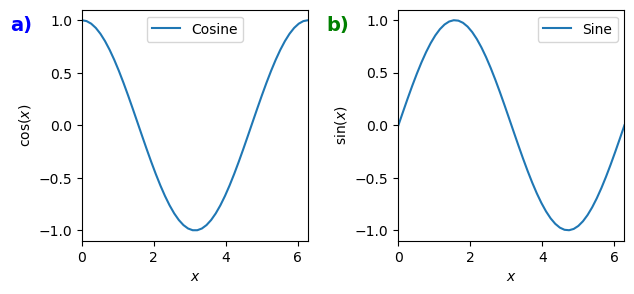

In [5]:
# Defining the x-values
xvalues = np.linspace(0, 2 * np.pi)

# Evaluating y-values
cosine_values = np.cos(xvalues)
sine_values = np.sin(xvalues)

# Create a plot figure of desired dimensions
plt.figure(figsize=(7,3))

# Create a subplot (rows, colums, panel number) and set the current axis (via panel number)
plt.subplot(1, 2, 1)
# Plot cosine values in the first subplot
plt.plot(xvalues, cosine_values, label="Cosine")

# Add axis labels and legend to current axis
plt.xlabel(r"$x$")
plt.ylabel(r"$\cos(x)$")
plt.legend()

# Adjust plot range
plt.xlim([0, 2 * np.pi])

# Add subfigure label
plt.text(-2, 0.9, "a)", fontsize=14, fontweight="bold", color="blue")

# Create second subplot and set the current axis 
# so all plt commands will now be associated with the second subplots
plt.subplot(1, 2, 2)
# Plot sine values in the second subplot
plt.plot(xvalues, sine_values, label="Sine")

# Add axis labels and legend to current axis
plt.xlabel(r"$x$")
plt.ylabel(r"$\sin(x)$")
plt.legend()

# Adjust plot range
plt.xlim([0, 2 * np.pi])

# To remove overlap between plots and labels
plt.subplots_adjust(wspace=0.4)

# Add subfigure label
plt.text(-2, 0.9, "b)", fontsize=14, fontweight="bold", color="green")

## Several subplots using the object-oriented interface

We can also make several plots in a figure by using the matplotlib.pyplot `subplots` function.
As opposed to `subplot`, the `subplots` function gives you a handle to the figure and axes objects.

Syntax: `fig, axes = plt.subplots(<number of rows>, <number of cols>)`

where `fig` is an instance of the `Figure` object and `axes` is a tuple of instances of the `Axis` object.
Please see this [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) for more options.

Let's repeat the example from above where we plot cosine in a plot to the left and sine in a plot to the right.

Text(-0.3, 1, 'b)')

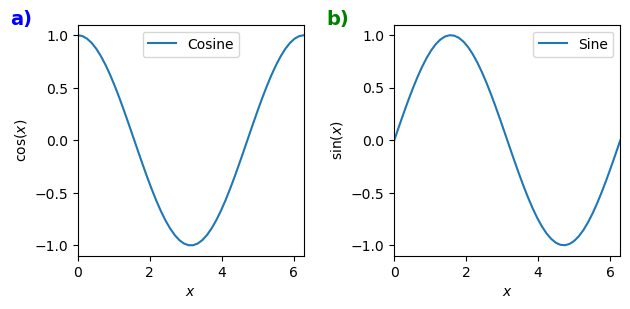

In [6]:
# Defining the x-values
xvalues = np.linspace(0, 2 * np.pi)

# Evaluating y-values
cosine_values = np.cos(xvalues)
sine_values = np.sin(xvalues)

# Create a figure and two subplots (one row, two columns) and unpack the output Axes tuple immediately (in ax1 and ax2)
# Also set the figure size to our liking
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Plot cosine values in the first subplot
ax1.plot(xvalues, cosine_values, label="Cosine")

# Plot sine values in the second subplot
ax2.plot(xvalues, sine_values, label="Sine")

# Add axis labels (note the additional set_ in set_xlabel when you are working on axis objects instead of plt)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\cos(x)$")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\sin(x)$")

# Add plot legends
ax1.legend()
ax2.legend()

# Adjust plot range
ax1.set_xlim([0, 2 * np.pi])
ax2.set_xlim([0, 2 * np.pi])

# To remove overlap between plots and labels
plt.subplots_adjust(wspace=0.4)

# Label the subplots with a) and b) for easier referencing when used as a figure in a publication
# The transform = ax.transAxes allows you to position the text by coordinates relative to the exes on a scale from 0 to 1.
# If you do not provide this argument, the text function will assume the actual coordinates

ax1.text(
    -0.3, 1, "a)", fontsize=14, fontweight="bold", color="blue", transform=ax1.transAxes
)
ax2.text(
    -0.3,
    1,
    "b)",
    fontsize=14,
    fontweight="bold",
    color="green",
    transform=ax2.transAxes,
)

## Matplotlib Challenge

Now it is your turn.

Below is a figure based on some data. Provided this data, your task is to reproduce the figure as closely as possible.

The example data is a truncated set of historical weather data from Stockholm, retrieved from the [Bolin Centre for Climate Research](https://bolin.su.se/data/stockholm-historical-daily-temperature-2?n=stockholm-historical-temps-daily-2), Stockholm University.

**Take notice of the following features**
* 2 subplots with shared x-axis
* y=0 degrees line in both plots
* legend in top right corner showing the plotted labels without a frame
* Title in plot
* Centered y-axis label
* No distance between plots
* Top plot:
    * fill between the average time of year (toy) +/- the std.dev. temperature
    * Plot of the average time of year (toy) temperature
    * No x-tick labels
* Bottom plot:
    * Plot the daily mean temperature

There is some starter code that loads the data in the cell below the plot.

![daily_avg_temperature](daily_avg_temperature.png)

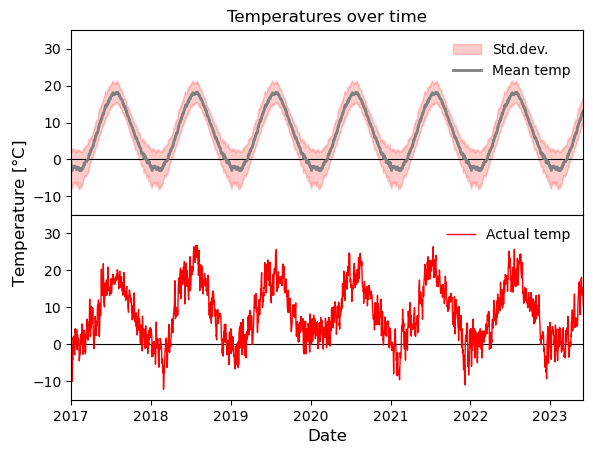

In [7]:
# --------------------------------------------
# Plotting task starting code
# Loading the data and fixing the data types
# --------------------------------------------
data = np.loadtxt(
    "stockholm_daily_mean_avg_std_temperature.csv",
    delimiter=",",
    usecols=(0, 1, 2, 3),
    skiprows=1,
    dtype=object,
    converters={
        0: lambda x: datetime.strptime(x.decode(), "%Y-%m-%d"),
        1: float,
        2: float,
        3: float,
    },
)
dates = data[:, 0]
daily_mean = data[:, 1].astype(float)
avg_toy = data[:, 2].astype(float)
stddev_toy = data[:, 3].astype(float)
# --------------------------------------------

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.text(
    0.02,
    0.5,
    r"Temperature [$\degree$C]",
    ha="center",
    va="center",
    rotation=90,
    fontsize=12,
)

x_values = np.arange(len(data[:, 0]))

ax1.set_title("Temperatures over time")
ax1.axhline(y=0, color="k", linewidth=0.8)
ax1.fill_between(
    dates,
    avg_toy - stddev_toy,
    avg_toy + stddev_toy,
    color="r",
    alpha=0.2,
    label="Std.dev.",
)
ax1.plot(dates, avg_toy, "grey", linewidth=2, label="Mean temp")
ax1.legend(frameon=False, loc="upper right")
ax1.set_ylim([-15, 35])
ax1.set_xlim([datetime(2017, 1, 1), datetime(2023, 6, 1)])
ax1.xaxis.set_ticklabels([])

# # Plot the actual data
ax2.axhline(y=0, color="k", linewidth=0.8)
ax2.plot(dates, daily_mean, "r", linewidth=1.0, label="Actual temp")
ax2.legend(frameon=False, loc="upper right")
ax2.set_ylim([-15, 35])
ax2.set_xlim([datetime(2017, 1, 1), datetime(2023, 6, 1)])
ax2.set_xlabel("Date", fontsize=12)
plt.subplots_adjust(left=0.1, hspace=0)
plt.savefig("daily_avg_temperature.png")


# Hint for xlims
# plt.xlim([datetime(2017, 1, 1), datetime(2023, 6, 1)])